In [1]:
# this notebook demonstrates some basic functionality of the gaiamock package. 
import numpy as np
import matplotlib.pyplot as plt
import gaiamock
%matplotlib inline

# read in the compiled C functions
c_funcs = gaiamock.read_in_C_functions()

In [2]:
# generate mock astrometry of a binary: 
# I am choosing values more or less at at random here. 

t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 21.2, dec=-16.4, parallax = 2.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 900, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc = 1.5, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs)

Text(0, 0.5, '$\\eta\\,[\\rm mas]$')

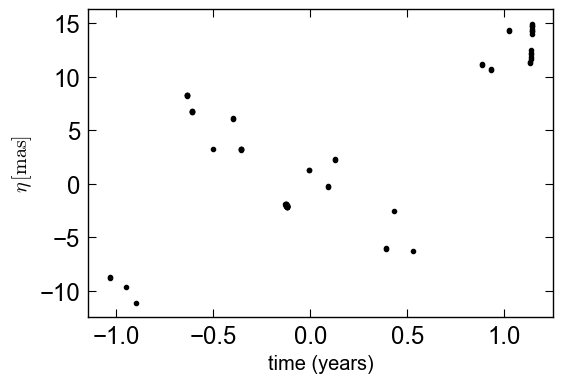

In [3]:
plt.errorbar(t_ast_yr, ast_obs, yerr=ast_err, fmt='k.')
plt.xlabel('time (years)')
plt.ylabel(r'$\eta\,[\rm mas]$')

single star chi2: 2349.36
binary star chi2: 65.16


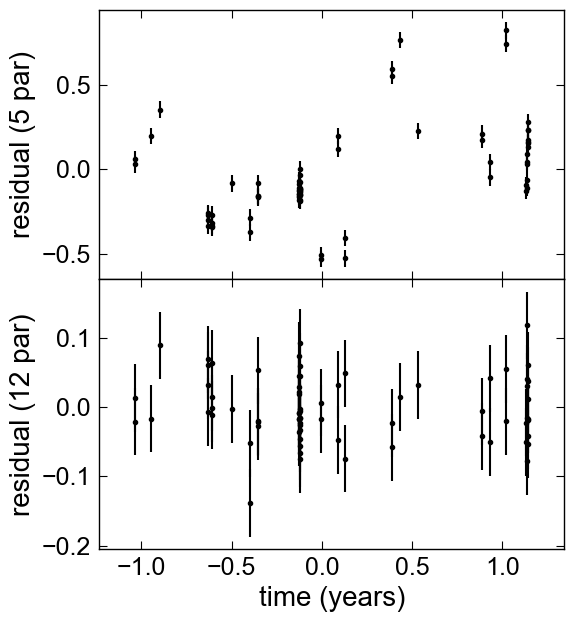

In [4]:
# try fitting the astrometry with a 5-parameter (single-star) model and plot the residuals. 
# also plot the residuals compared to the (known) true binary solution. 

gaiamock.plot_residuals(t_ast_yr, psi, plx_factor, ast_obs, ast_err, theta_array=[900, 293*2*np.pi/900, 0.3], c_funcs=c_funcs)

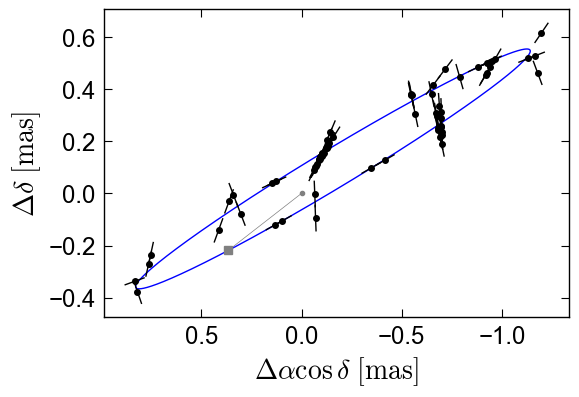

In [5]:
# want to plot the orbit in 2D?

gaiamock.plot_2d_orbit_and_residuals(t_ast_yr = t_ast_yr, psi=psi, plx_factor=plx_factor, 
            ast_obs=ast_obs, ast_err=ast_err, period = 900, ecc=0.3, Tp=293, 
            m1=0.9, m2=0.65, delta_ra=0, delta_dec=0, parallax=2.1, pmra=-7.5, pmdec=13.2, f=0.2, data_release='dr3', 
                                     w=1.0, omega=2.0, inc=1.5, c_funcs=c_funcs)

9 parameter solution accepted! Not trying anything else.
s9: 16.7, plx_over_err9: 88.7, F2_9: 1.9
single star chi2: 2171.26
9 parameter chi2: 86.54


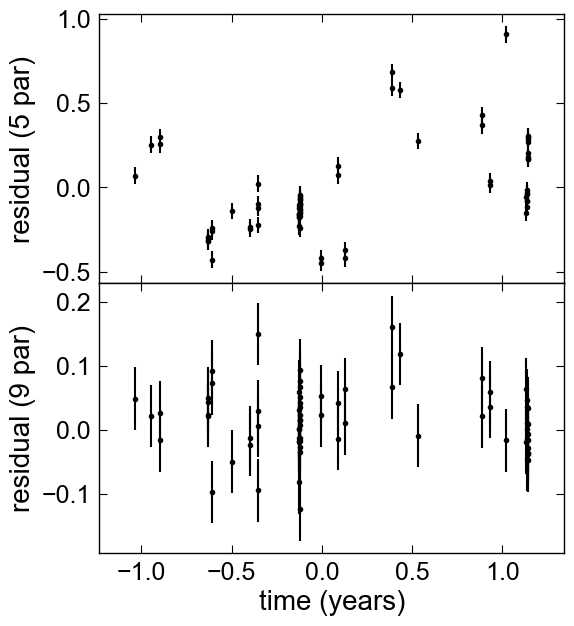

In [6]:
# now try running the full pipeline for the same parameters. That is, generate mock astrometry for a binary with 
# these parameters, and fit it with the cascade of astrometric models used in DR3. Stop when the first model is accepted. 
results_array = gaiamock.run_full_astrometric_cascade(ra = 21.2, dec=-16.4, parallax = 2.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 900, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc_deg = 1.5*180/np.pi, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs, verbose=True, show_residuals=True)

found best-fit nonlinear parameters: [5.01146767e+02 3.95299414e+00 3.09802340e-01]
single star chi2: 7559.07
binary star chi2: 61.98
goodness_of_fit (F2) is low enough to pass DR3 cuts! F2: 0.4
a0_over_err is high enough to pass DR3 cuts! a0_over_err: 50.3
parallax over error is high enough to pass DR3 cuts! parallax_over_error: 123.4
eccentricity error is low enough to pass DR3 cuts! ecc_error: 0.03


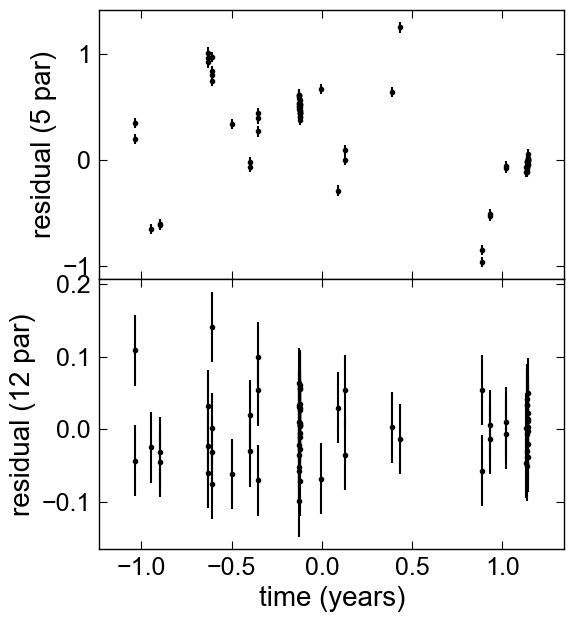

In [7]:
# try a shorter period, which will need an orbital solution. 
results_array = gaiamock.run_full_astrometric_cascade(ra = 21.2, dec=-16.4, parallax = 3.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 500, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc_deg = 1.5*180/np.pi, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs, verbose=True, show_residuals=True)

found best-fit nonlinear parameters: [5.08977691e+02 4.39684596e+00 1.48432351e-01]
single star chi2: 307.54
binary star chi2: 74.92
goodness_of_fit (F2) is low enough to pass DR3 cuts! F2: 0.8
a0_over_err is high enough to pass DR3 cuts! a0_over_err: 9.6
parallax over error is NOT high enough to pass DR3 cuts! parallax_over_error: 17.9
eccentricity error is low enough to pass DR3 cuts! ecc_error: 0.21


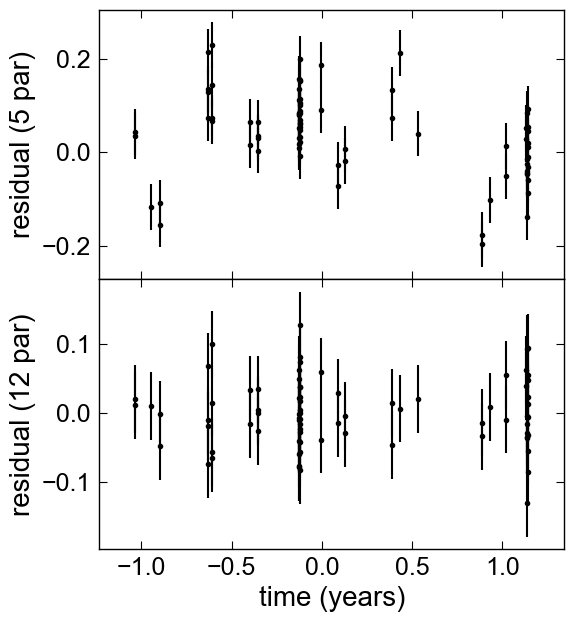

In [8]:
# Move the same binary farther away...
results_array = gaiamock.run_full_astrometric_cascade(ra = 21.2, dec=-16.4, parallax = 0.5, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 500, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc_deg = 1.5*180/np.pi, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs, verbose=True, show_residuals=True)

7 parameter solution accepted! Not trying anything else.
single star chi2: 885.62
7-parameter chi2: 119.19


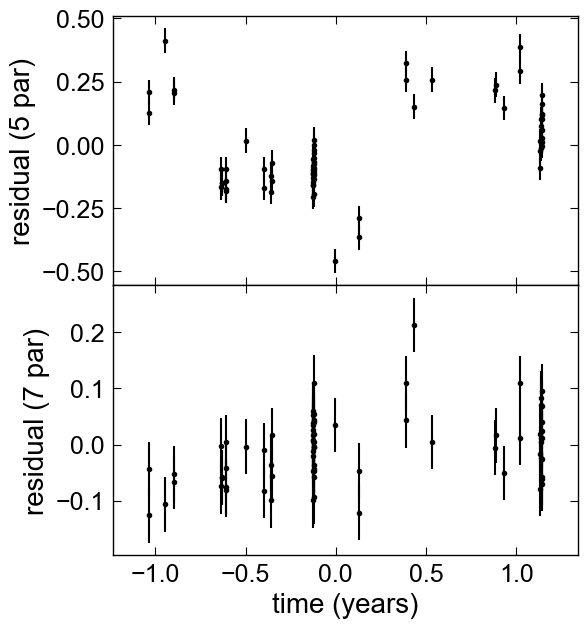

In [9]:
# A longer period, which will most likely get a 7 parameter solution 
results_array = gaiamock.run_full_astrometric_cascade(ra = 21.2, dec=-16.4, parallax = 1.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 2000, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc_deg = 1.5*180/np.pi, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs, verbose=True, show_residuals=True)

In [10]:
# retrieve the scan times and angles for a particular sky location and data release 
scan_metadata = gaiamock.get_gost_one_position(ra=21.2, dec=-16.4, data_release='dr3')
scan_metadata

Target,ra[rad],dec[rad],CcdRow[1-7],scanAngle[rad],parallaxFactorAlongScan,ObservationTimeAtBarycentre[BarycentricJulianDateInTCB]
int64,float64,float64,int64,float64,float64,float64
31375,0.3681553890925539,-0.28509644025274633,3,-1.2775012082712864,0.6596226200079266,2457011.288252273
...,...,...,...,...,...,...
31375,0.3681553890925539,-0.28509644025274633,1,0.04255107263839057,-0.011073961606575995,2457806.6522989306
31375,0.3681553890925539,-0.28509644025274633,2,0.03715432334391666,-0.00652733521825148,2457806.7263585743


Text(0, 0.5, '$\\eta\\,\\,[\\rm mas]$')

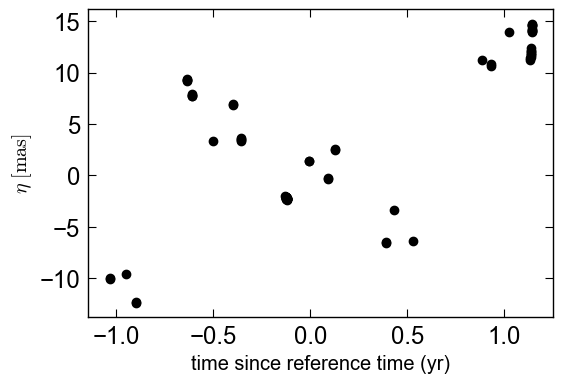

In [11]:
# what if you want to predict astromety from a single star? There's a function for that

t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_single_source(ra = 21.2, dec=-16.4, 
            parallax = 2.1, pmra = -7.5, pmdec = 13.2, phot_g_mean_mag = 13.4,data_release = 'dr3', c_funcs = c_funcs)

plt.errorbar(t_ast_yr, ast_obs, yerr=ast_err, fmt='ko')
plt.xlabel('time since reference time (yr)')
plt.ylabel(r'$\eta\,\,[\rm mas]$')


In [12]:
# try fitting a 5-parameter solution and checking its ruwe (really UWE)
# here mu and sigma_mu are ra, pmra, dec, pmdec, plx, and the corresponding uncertainties
ruwe, mu, sigma_mu = gaiamock.check_ruwe(t_ast_yr, psi, plx_factor, ast_obs, ast_err)
print(ruwe)

1.1409453974576045


In [13]:
# on the other hand, if we predict ruwe for a binary, we should get a bad fit. 
t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 21.2, dec=-16.4, parallax = 2.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 900, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc = 1.5, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs)
ruwe, mu, sigma_mu = gaiamock.check_ruwe(t_ast_yr, psi, plx_factor, ast_obs, ast_err)
print(ruwe)

5.811062117088565


Text(0, 0.5, '$\\rm RUWE$')

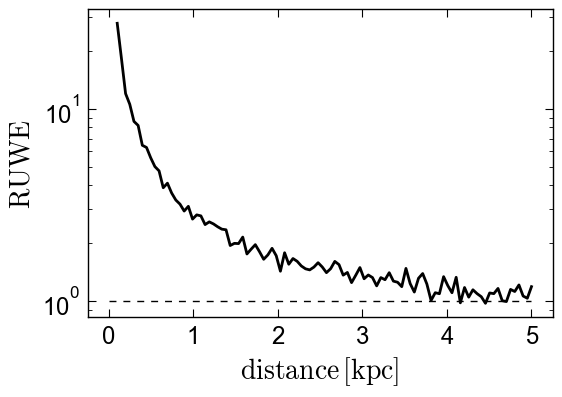

In [14]:
# now let's predict ruwe for the same binary at a range of distances. We'll assume no extinction
dist_kpc = np.linspace(0.1, 5, 100)
Mg0 = 5
all_ruwe = []
for d_kpc in dist_kpc:
    pallax_pred = 1/d_kpc
    phot_g_mean_mag = 5.0 - 5*np.log10(pallax_pred/100)
    t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 21.2, dec=-16.4, parallax = pallax_pred, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 900, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc = 1.5, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs)
    ruwe, mu, sigma_mu = gaiamock.check_ruwe(t_ast_yr, psi, plx_factor, ast_obs, ast_err)
    all_ruwe.append(ruwe)
plt.plot(dist_kpc, all_ruwe, 'k', lw=2)
plt.plot([0, 5], [1, 1], 'k--', lw=1)
plt.yscale('log')
plt.xlabel(r'$\rm distance\,[kpc]$', fontsize=20)
plt.ylabel(r'$\rm RUWE$', fontsize=20)

Text(0, 0.5, 'RV (km/s)')

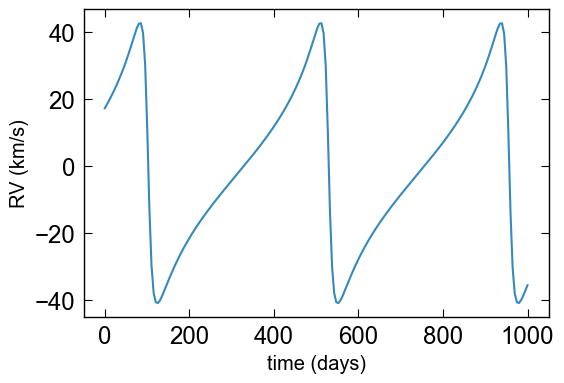

In [15]:
# You can also use this code to (quickly) calculate RV curves. 
rv_time_grid = np.linspace(0, 1000, 200)
rv_curve = gaiamock.predict_radial_velocities(t_rvs_day = rv_time_grid, period = 427, Tp = 102, ecc = 0.7, 
                                              w = 1.5, K = 42, gamma = -1.2, c_funcs = c_funcs)
plt.plot(rv_time_grid, rv_curve)
plt.xlabel('time (days)')
plt.ylabel('RV (km/s)')

Text(0, 0.5, '$\\rm RV\\,\\,[km\\,s^{-1}]$')

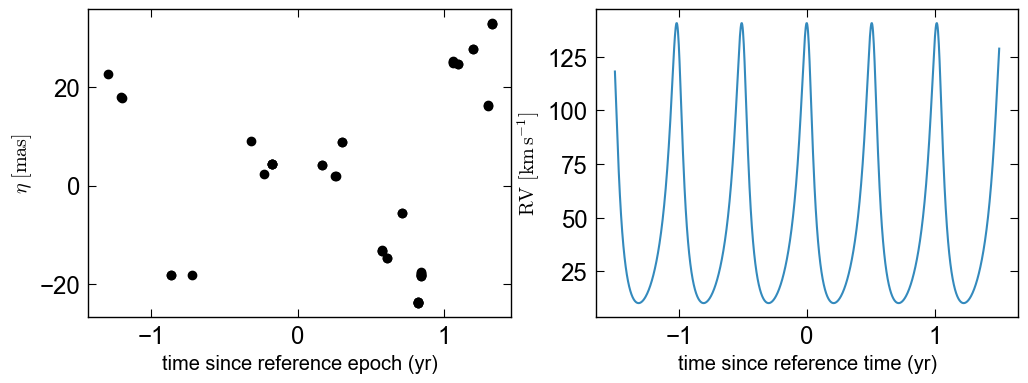

In [16]:
# there is also a convenience function for predicting astrometry and RVs at the same time. Let's do it for Gaia BH1

scan_metadata = gaiamock.get_gost_one_position(ra=262.1712081, dec=-0.58109202, data_release='dr3')
psi, plx_factor, jds = gaiamock.fetch_table_element(['scanAngle[rad]', 'parallaxFactorAlongScan', 'ObservationTimeAtBarycentre[BarycentricJulianDateInTCB]'], scan_metadata)
t_ast_day = jds - 2457389.0 # reference time for DR3
t_ast_yr = t_ast_day/365.25 

t_rvs_yr = np.linspace(-1.5, 1.5, 1000) # arbitrary 

ast_pred, rvs_pred = gaiamock.predict_astrometry_and_rvs_simultaneously(t_ast_yr = t_ast_yr, psi = psi, 
        plx_factor = plx_factor, t_rvs_yr = t_rvs_yr, period = 185.387, Tp=2.07, ecc=0.43230, m1=0.93, 
       m2=9.27, f=0, parallax=2.09, pmra=-7.70, pmdec=-25.85, omega=97.0*np.pi/180, w=16.509*np.pi/180,
       inc_deg=126.8, gamma=48.379, c_funcs=c_funcs)

f, ax =plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(t_ast_yr, ast_pred, 'ko')
ax[1].plot(t_rvs_yr, rvs_pred)
ax[0].set_xlabel('time since reference epoch (yr)')
ax[1].set_xlabel('time since reference time (yr)')
ax[0].set_ylabel(r'$\eta\,\,[\rm mas]$')
ax[1].set_ylabel(r'$\rm RV\,\,[km\,s^{-1}]$')

In [17]:
# What's the probability that a binary with some properties would have gotten an orbital solution in DR3?
# simulate a 100 binaries all across the sky, within a 500 pc volume, and report the outcomes
ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
    d_min = 0, d_max = 500, period = 800, Mg_tot = 4.5, f = 0.2, m1 = 1, m2 = 0.7, ecc = 0.3, 
    N_realizations = 100, data_release='dr3', do_dust=True)

0 out of 100 solutions had insufficient visibility periods
0 out of 100 solutions had ruwe < 1.4
13 out of 100 solutions got 9-parameter solutions
2 out of 100 solutions got 7-parameter solutions
84 out of 100 solutions passed all cuts and got an orbital solution!
1 out of 100 solutions got to orbital solutions but failed at least one cut. 


Text(0, 0.5, 'Dec (deg)')

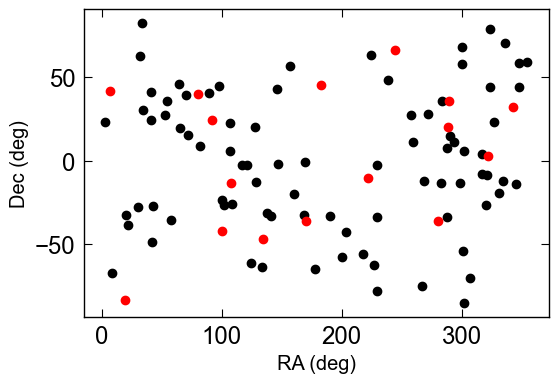

In [18]:
# plot the sky distribution of the ones that did and did not get accepted with orbital solutions. 
plt.plot(ra[accept], dec[accept], 'ko')
plt.plot(ra[~accept], dec[~accept], 'ro')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')

Text(0, 0.5, 'G (mag)')

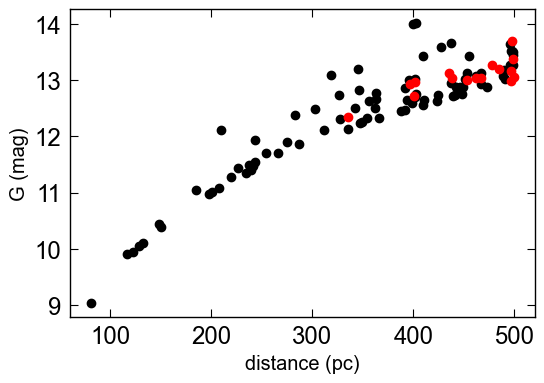

In [19]:
# and their distances. 
plt.plot(d_pc[accept], phot_g_mean_mag[accept], 'ko')
plt.plot(d_pc[~accept], phot_g_mean_mag[~accept], 'ro')
plt.xlabel('distance (pc)')
plt.ylabel('G (mag)')

In [20]:
# what if we want everything at the same distance (e.g. if we want to make plots like Figs 12-15 of the paper)?
# the simplest approach is to set d_min and d_max to a narrow range, e.g:
dist_pc = 500
d_min, d_max = 0.99*dist_pc, 1.01*dist_pc
ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
    d_min = d_min, d_max = d_max, period = 800, Mg_tot = 4.5, f = 0.2, m1 = 1, m2 = 0.7, ecc = 0.3, 
    N_realizations = 100, data_release='dr3', do_dust=True)

0 out of 100 solutions had insufficient visibility periods
0 out of 100 solutions had ruwe < 1.4
13 out of 100 solutions got 9-parameter solutions
0 out of 100 solutions got 7-parameter solutions
82 out of 100 solutions passed all cuts and got an orbital solution!
5 out of 100 solutions got to orbital solutions but failed at least one cut. 


In [21]:
# We can also make predictions for DR4+:
ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
    d_min = d_min, d_max = d_max, period = 800, Mg_tot = 4.5, f = 0.2, m1 = 1, m2 = 0.7, ecc = 0.3, 
    N_realizations = 100, data_release='dr4', do_dust=True)

0 out of 100 solutions had insufficient visibility periods
0 out of 100 solutions had ruwe < 1.4
0 out of 100 solutions got 9-parameter solutions
0 out of 100 solutions got 7-parameter solutions
100 out of 100 solutions passed all cuts and got an orbital solution!
0 out of 100 solutions got to orbital solutions but failed at least one cut. 


In [22]:
# Let's use the code to fit the real epoch astrometry for Gaia BH3 


bh3_ra_deg, bh3_dec_deg = 294.8278502411, 14.9309190720 # Right Ascension from paper Table 2
DR4_REFERENCE_EPOCH = 2457936.875

import pandas as pd
columns = 'transit_id ccd_id obs_time_tcb centroid_pos_al centroid_pos_error_al parallax_factor_al scan_pos_angle outlier_flag'.split()
gaia_astrometry = pd.read_csv('data/epochast.dat', names=columns, delim_whitespace=True, comment='#')

# remove outliers
gaia_astrometry = gaia_astrometry[gaia_astrometry['outlier_flag']!=1]

psi = np.array(np.deg2rad(gaia_astrometry['scan_pos_angle']))
t_ast_yr = (np.array(gaia_astrometry['obs_time_tcb']) - DR4_REFERENCE_EPOCH)/365.25
plx_factor = np.array(gaia_astrometry['parallax_factor_al'])
ast_obs, ast_err = np.array(gaia_astrometry['centroid_pos_al']), np.array(gaia_astrometry['centroid_pos_error_al'])

# bin the data (averaging across CCDs within a given FOV transit)
new_idx = np.concatenate([[0], np.arange(len(t_ast_yr)-1)[np.diff(t_ast_yr) > 1e-6] + 1])
psi_mean, t_ast_yr_mean, plx_factor_mean, ast_obs_mean, ast_err_mean = [], [], [], [], []
for i, idx in enumerate(new_idx):
    try:
        these_idx = np.arange(new_idx[i], new_idx[i+1])
    except IndexError:
        these_idx = np.arange(new_idx[i], len(t_ast_yr))
    psi_mean.append(np.mean(psi[these_idx]))
    t_ast_yr_mean.append(np.mean(t_ast_yr[these_idx]))
    plx_factor_mean.append(np.mean(plx_factor[these_idx]))
    ast_obs_mean.append( np.sum(ast_obs[these_idx] / ast_err[these_idx]**2) / np.sum(1 / ast_err[these_idx]**2) )
    ast_err_mean.append(np.sqrt(1 / np.sum(1 / ast_err[these_idx]**2)) )
psi_mean, t_ast_yr_mean, plx_factor_mean, ast_obs_mean, ast_err_mean = np.array(psi_mean), \
    np.array(t_ast_yr_mean), np.array(plx_factor_mean), np.array(ast_obs_mean), np.array(ast_err_mean)


/var/folders/_4/hh3dgzmd13l0wvjyf6tkz1cm0000gn/T/ipykernel_5276/1642964419.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gaia_astrometry = pd.read_csv('data/epochast.dat', names=columns, delim_whitespace=True, comment='#')



single star chi2: 1835181.69
binary star chi2: 103.04


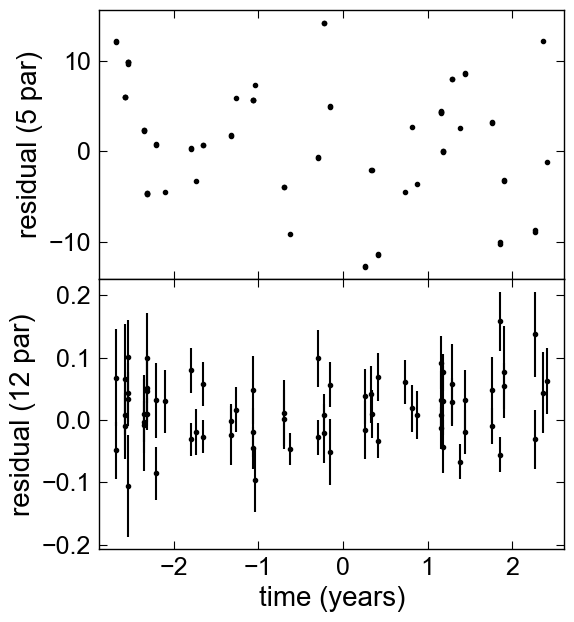

In [26]:
# run the fit!
res = gaiamock.fit_orbital_solution_nonlinear(t_ast_yr = t_ast_yr_mean, psi = psi_mean, 
        plx_factor = plx_factor_mean, ast_obs = ast_obs_mean, ast_err = ast_err_mean, c_funcs = c_funcs)

gaiamock.plot_residuals(t_ast_yr_mean, psi_mean, plx_factor_mean, ast_obs_mean, ast_err_mean, theta_array=res, c_funcs=c_funcs)

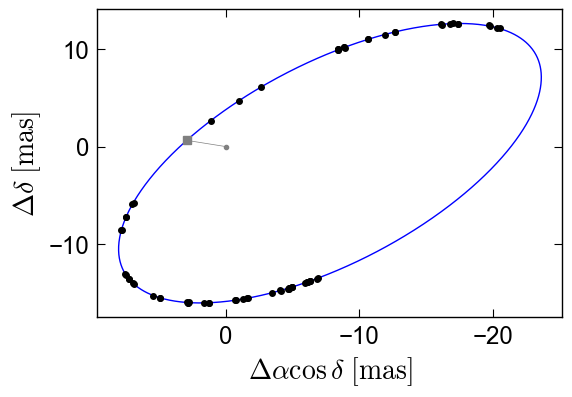

In [28]:
# make a 2D plot

# get the linear parameters 
period, phi_p, ecc = res
chi2, mu_linear = gaiamock.get_astrometric_chi2(t_ast_yr = t_ast_yr, psi = psi, plx_factor = plx_factor, 
        ast_obs = ast_obs, ast_err = ast_err, P = period, phi_p = phi_p, ecc = ecc, c_funcs=c_funcs)
ra_off, pmra, dec_off, pmdec, plx, B, G, A, F = mu_linear

# translate into campbell elements 
a0_mas, inc, w, omega = gaiamock.get_Campbell_elements(A=A, B=B, F=F, G=G)
M1 = 0.76 # msun
M2 = gaiamock.get_companion_mass_from_mass_function(M1=M1, a0_mas=a0_mas, period=period, 
                                                    parallax=plx, fluxratio=0, tol=1e-6)
gaiamock.plot_2d_orbit_and_residuals(t_ast_yr = t_ast_yr_mean, psi=psi_mean, plx_factor=plx_factor_mean, 
            ast_obs=ast_obs_mean, ast_err=ast_err_mean, period = period, ecc=ecc, Tp=phi_p*period/(2*np.pi), 
            m1=M1, m2=M2, delta_ra=ra_off,delta_dec=dec_off, parallax=plx, pmra=pmra, pmdec=pmdec, f=0.0, 
            data_release='dr4', w=w, omega=omega, inc=inc, c_funcs=c_funcs)